### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import numpy as np

import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


Target: 'IS_SUCCESSFUL' ;  Features: all other, non-beneficial ID columns

In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN','NAME'])
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df['APPLICATION_TYPE'].value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

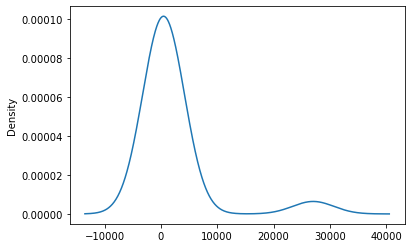

In [5]:
# Visualize the value counts of APPLICATION_TYPE
application_type_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than 500
replace_application = list(application_type_counts[application_type_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df['CLASSIFICATION'].value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

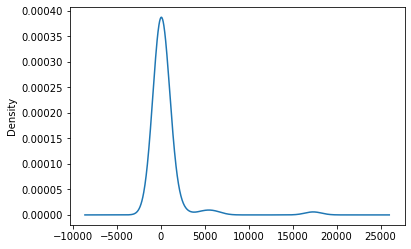

In [8]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1750].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [11]:
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [12]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\ParulGoyal\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True,right_index=True).drop(application_cat,1)
application_df

C:\Users\ParulGoyal\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,5000,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<AxesSubplot:>

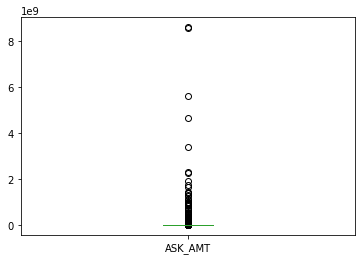

In [14]:
#Check for outliers - ASK_AMT
application_df['ASK_AMT'].plot.box()

In [15]:
application_df['ASK_AMT'].describe()

count    3.429900e+04
mean     2.769199e+06
std      8.713045e+07
min      5.000000e+03
25%      5.000000e+03
50%      5.000000e+03
75%      7.742000e+03
max      8.597806e+09
Name: ASK_AMT, dtype: float64

<AxesSubplot:>

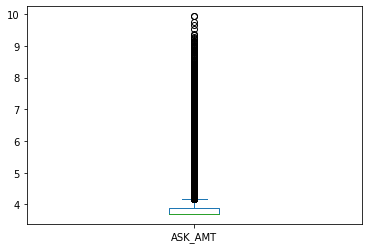

In [16]:
np.log10(application_df["ASK_AMT"]).plot.box()

In [17]:
np.log10(application_df["ASK_AMT"]).describe()

count    34299.000000
mean         4.087593
std          0.810174
min          3.698970
25%          3.698970
50%          3.698970
75%          3.888853
max          9.934388
Name: ASK_AMT, dtype: float64

In [18]:
#Optimization of ASK_AMT column - dealing with large range and outliers
#application_df['ASK_AMT'] = np.log10(application_df["ASK_AMT"])

In [19]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
#Optimization 1 - Noisy variables are removed from features
X = application_df.drop(columns=["IS_SUCCESSFUL","ASK_AMT"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, stratify=y)

In [20]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [21]:
len(X_train_scaled[0])

42

### Deliverable 2: Compile, Train and Evaluate the Model

In [22]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
#Optimization - Additional neurons are added to hidden layers
hidden_nodes_layer1 = len(X_train_scaled[0])*3
hidden_nodes_layer2 = len(X_train_scaled[0])*2
#Optimization - Additional hidden layers are added
hidden_nodes_layer3 = len(X_train_scaled[0])

nn = tf.keras.models.Sequential()

#Optimization - The activation function of hidden layers or output layers is changed for optimization
# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, 
                             input_dim=number_input_features, 
                             activation="relu"))
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2,
                             input_dim=number_input_features,
                             activation="sigmoid"))
# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3,
                             activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 126)               5418      
                                                                 
 dense_1 (Dense)             (None, 84)                10668     
                                                                 
 dense_2 (Dense)             (None, 42)                3570      
                                                                 
 dense_3 (Dense)             (None, 1)                 43        
                                                                 
Total params: 19,699
Trainable params: 19,699
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
# Train the model
#Optimization - increase number of epochs
fit_model = nn.fit(X_train,y_train,epochs=200)

Epoch 1/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5782 - accuracy: 0.7132
Epoch 2/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5617 - accuracy: 0.7234
Epoch 3/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5555 - accuracy: 0.7270
Epoch 4/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5536 - accuracy: 0.7288
Epoch 5/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5527 - accuracy: 0.7284
Epoch 6/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5515 - accuracy: 0.7292
Epoch 7/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5509 - accuracy: 0.7292
Epoch 8/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5504 - accuracy: 0.7305
Epoch 9/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5493 - accuracy: 0.7306
Epoch 10/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5483 - accura

804/804 [==============================] - 1s 1ms/step - loss: 0.5341 - accuracy: 0.7367
Epoch 82/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5337 - accuracy: 0.7389
Epoch 83/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5342 - accuracy: 0.7390
Epoch 84/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5342 - accuracy: 0.7386
Epoch 85/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5342 - accuracy: 0.7388
Epoch 86/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5336 - accuracy: 0.7384
Epoch 87/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5336 - accuracy: 0.7354
Epoch 88/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5338 - accuracy: 0.7374
Epoch 89/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5335 - accuracy: 0.7388
Epoch 90/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5336 - accuracy: 

804/804 [==============================] - 1s 1ms/step - loss: 0.5308 - accuracy: 0.7399
Epoch 161/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5311 - accuracy: 0.7400
Epoch 162/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5310 - accuracy: 0.7412
Epoch 163/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5307 - accuracy: 0.7410
Epoch 164/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5309 - accuracy: 0.7405
Epoch 165/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5309 - accuracy: 0.7404
Epoch 166/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5308 - accuracy: 0.7404
Epoch 167/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5308 - accuracy: 0.7404
Epoch 168/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5308 - accuracy: 0.7399
Epoch 169/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5310 - a

In [25]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [26]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epoch
#Optimization - The model's weights are saved every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

# Fit the model to the training data
#Optimization - increase number of epochs
fit_model = nn.fit(X_train_scaled,y_train,epochs=200,callbacks=[cp_callback])

Epoch 1/200
804/804 [==============================] - 1s 1ms/step - loss: 0.6132 - accuracy: 0.7181
Epoch 2/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5565 - accuracy: 0.7284
Epoch 3/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5525 - accuracy: 0.7304
Epoch 4/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5508 - accuracy: 0.7301
Epoch 5/200
783/804 [============================>.] - ETA: 0s - loss: 0.5493 - accuracy: 0.7326
Epoch 5: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5493 - accuracy: 0.7328
Epoch 6/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5488 - accuracy: 0.7308
Epoch 7/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5479 - accuracy: 0.7329
Epoch 8/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5469 - accuracy: 0.7336
Epoch 9/200
804/804 [==============================] -

804/804 [==============================] - 1s 1ms/step - loss: 0.5391 - accuracy: 0.7370
Epoch 64/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5382 - accuracy: 0.7368
Epoch 65/200
784/804 [============================>.] - ETA: 0s - loss: 0.5384 - accuracy: 0.7372
Epoch 65: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5379 - accuracy: 0.7375
Epoch 66/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5378 - accuracy: 0.7371
Epoch 67/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5382 - accuracy: 0.7362
Epoch 68/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5381 - accuracy: 0.7354
Epoch 69/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5382 - accuracy: 0.7385
Epoch 70/200
778/804 [============================>.] - ETA: 0s - loss: 0.5383 - accuracy: 0.7362
Epoch 70: saving model to checkpoints\weights.70.hdf5
804/804 

Epoch 126/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5363 - accuracy: 0.7383
Epoch 127/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5361 - accuracy: 0.7395
Epoch 128/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5365 - accuracy: 0.7381
Epoch 129/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5356 - accuracy: 0.7384
Epoch 130/200
794/804 [============================>.] - ETA: 0s - loss: 0.5358 - accuracy: 0.7398
Epoch 130: saving model to checkpoints\weights.130.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5362 - accuracy: 0.7395
Epoch 131/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5362 - accuracy: 0.7379
Epoch 132/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5357 - accuracy: 0.7386
Epoch 133/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5367 - accuracy: 0.7383
Epoch 134/200
804/804 [============

804/804 [==============================] - 1s 1ms/step - loss: 0.5342 - accuracy: 0.7391
Epoch 190/200
775/804 [===========================>..] - ETA: 0s - loss: 0.5350 - accuracy: 0.7374
Epoch 190: saving model to checkpoints\weights.190.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5355 - accuracy: 0.7372
Epoch 191/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5351 - accuracy: 0.7382
Epoch 192/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5357 - accuracy: 0.7383
Epoch 193/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5351 - accuracy: 0.7390
Epoch 194/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5345 - accuracy: 0.7391
Epoch 195/200
793/804 [============================>.] - ETA: 0s - loss: 0.5347 - accuracy: 0.7398
Epoch 195: saving model to checkpoints\weights.195.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5349 - accuracy: 0.7395
Epoch 196/2

In [27]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5542 - accuracy: 0.7292 - 399ms/epoch - 1ms/step
Loss: 0.5541859865188599, Accuracy: 0.7292128205299377


In [28]:
# Export results to an HDF5 file
#Optimization - The results are saved to an HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")